<a href="https://colab.research.google.com/github/leoisqualified/data-analysis-and-ml/blob/main/Salary_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df=pd.read_csv('/content/salaries.csv')
df.head()

,Name,Age,Job,Salary
0,Kevin Sanders,24,Software Engineer,7300
1,Lisa Mills,26,High School Teacher,6100
2,Donna Allison,27,Dentist,12700
3,Michael Schmitt,43,Dentist,17500
4,Lisa Shaffer,31,Accountant,7400


In [5]:
df.describe()

,Age,Salary
count,1000.000000,1000.000000
mean,43.241000,13609.500000
std,12.485784,4242.159316
min,23.000000,4000.000000
25%,32.000000,10300.000000
50%,43.000000,13300.000000
75%,54.000000,16800.000000
max,65.000000,24100.000000


In [11]:
df.drop_duplicates()

,Name,Age,Job,Salary
0,Kevin Sanders,24,Software Engineer,7300
1,Lisa Mills,26,High School Teacher,6100
2,Donna Allison,27,Dentist,12700
3,Michael Schmitt,43,Dentist,17500
4,Lisa Shaffer,31,Accountant,7400
...,...,...,...,...
995,Darin Erickson,47,Accountant,13200
996,Scott Mcdaniel,59,High School Teacher,17300
997,Erica Smith,35,High School Teacher,8100
998,Tanya Jones,54,Dentist,20300


In [7]:
df.isnull().sum()

Name      0
Age       0
Job       0
Salary    0
dtype: int64

**Determining Outliers**

<Axes: xlabel='Salary'>

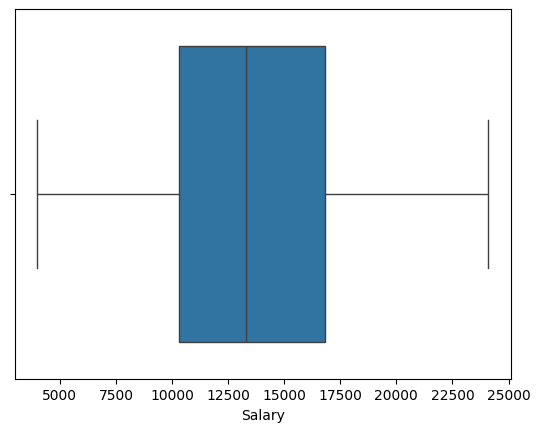

In [10]:
sns.boxplot(x=df['Salary'])

<Axes: xlabel='Age'>

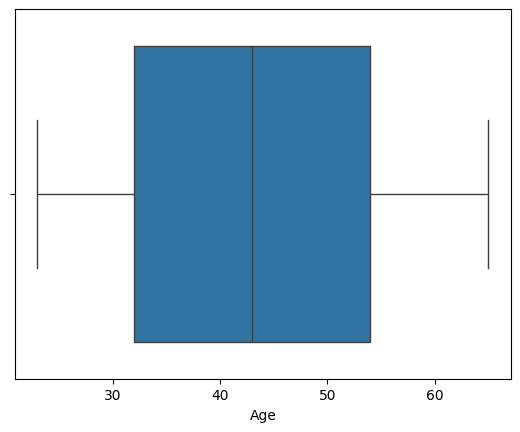

In [17]:
sns.boxplot(x=df['Age'])

In [12]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1
outliers=df[(df['Age']<(Q1-1.5*IQR))|(df['Age']>(Q3+1.5*IQR))]
print(outliers)

Empty DataFrame
Columns: [Name, Age, Job, Salary]
Index: []


In [13]:
Q1=df['Salary'].quantile(0.25)
Q3=df['Salary'].quantile(0.75)
IQR=Q3-Q1
outliers=df[(df['Salary']<(Q1-1.5*IQR))|(df['Salary']>(Q3+1.5*IQR))]
print(outliers)

Empty DataFrame
Columns: [Name, Age, Job, Salary]
Index: []


<Axes: >

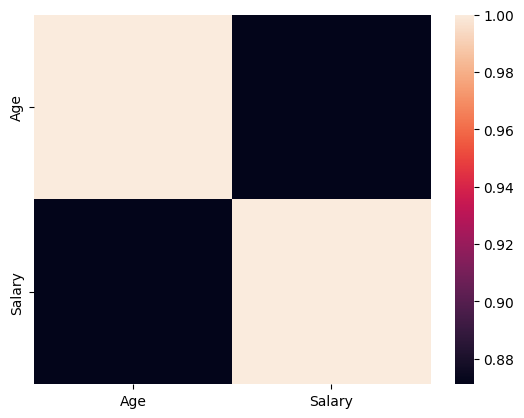

In [16]:
corr=df[['Age','Salary']].corr()
sns.heatmap(corr)

# ***Training the model to make predictions ***

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
features= 'Age'
target= 'Salary'

X=df[features].values.reshape(-1,1)
y=df[target]
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)

model= LinearRegression()
model.fit(X_train,y_train)

a=input('Your Age:')
print('Your Salary should be around',model.predict(X))

Your Age:24
Your Salary should be around [ 7918.40423077  8507.4154635   8801.92107986 13514.01094164
  9979.9435453   8212.90984714 16164.56148889 17342.58395434
  8212.90984714 14397.52779072 10274.44916167 19698.62888523
 18226.10080342 11746.97724347 10274.44916167 10274.44916167
 18520.60641978 12335.98847619 17637.0895707  10274.44916167
 12924.99970892 19404.12326887  7918.40423077 12041.48285983
 12630.49409256 12630.49409256 14103.02217436 19109.6176525
 11746.97724347 11452.47162711 13219.50532528 17931.59518706
 14103.02217436  7623.89861441 19993.13450159 10568.95477803
  9979.9435453  13808.516558   12041.48285983 13219.50532528
 18815.11203614 11157.96601075 17931.59518706 15281.04463981
  9979.9435453   9096.42669622 14397.52779072 19404.12326887
 19404.12326887 14103.02217436 18226.10080342 18520.60641978
 19993.13450159 14397.52779072 14692.03340708 10568.95477803
 15281.04463981 18815.11203614 12041.48285983 12924.99970892
 11452.47162711 16164.56148889 10568.95477803